In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing the Dataset

In [2]:
df= pd.read_csv("PakistanSuicideAttacks Ver 11 (30-November-2017).csv",
               encoding='latin-1')

# Details about Dataset

In [3]:
df.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [4]:
#columns in the dataset
df.columns

Index(['S#', 'Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [5]:
#data types of the columns and null value info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S#                       496 non-null    int64  
 1   Date                     496 non-null    object 
 2   Islamic Date             342 non-null    object 
 3   Blast Day Type           486 non-null    object 
 4   Holiday Type             72 non-null     object 
 5   Time                     285 non-null    object 
 6   City                     496 non-null    object 
 7   Latitude                 493 non-null    float64
 8   Longitude                493 non-null    object 
 9   Province                 496 non-null    object 
 10  Location                 493 non-null    object 
 11  Location Category        461 non-null    object 
 12  Location Sensitivity     460 non-null    object 
 13  Open/Closed Space        461 non-null    object 
 14  Influencing Event/Event  1

In [6]:
#statistical Information
df.describe()

,S#,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [7]:
#shape of the dataset 
df.shape

(496, 26)

# Details about Complex Columns
**Blast Day Type** Represent the specific day the blast happened like either it was a working day, holiday or weekend.

**Location category** column secified detail of location to which department that location was connected where bomb blast incident occured.

**Holiday Type** column give detail about the holiday either it was a weekend or religious holiday.

**Location Senstivity** column represent the senstivity of location of bomb blast, either it was High Sensitive, Medium or low.

# Preparing Data for the EDA

Removing S# Column as it does not have any role in the eda because we already have the index column.

In [8]:
df.drop('S#',
       axis = 1,
       inplace=True)

In [9]:
df.head(2)

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786


In [10]:
#shape of the dataset
df.shape

(496, 25)

### Handling Null Values in Important Columns

In [11]:
df.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

##### Firstly Finding How many Null Rows are present in the important Columns

In [46]:
#firstly lets check how many null values are in Blast Day type Column
print("Number of Null Values in 'Blast Day Type' Column: ", df['Blast Day Type'].isnull().sum())

#Null values in the City Column
print("\nNumber of Null Values in 'City' Column: ", df['City'].isnull().sum())

#Null values in the Province Column
print("\nNumber of Null Values in 'Province' Column: ",df['Province'].isnull().sum())

#Number of Null values in the Location Category Column
print("\nNumber of Null Values in 'Location Category' Column: ", df['Location Category'].isnull().sum())

#Number of Null Values in the Location Senstivity Column
print("\nNumber of Null Values in 'Location Senstivity' Column: ", df['Location Sensitivity'].isnull().sum())

#number of null values in target type
print("\nNumber of Null Values in 'Target Type' Column: ", df['Target Type'].isnull().sum())

#number of null values in Target Sect if any 
print("\nNumber of Null Values in 'Target Sect if any' Column: ", df['Targeted Sect if any'].isnull().sum())

#number of null values in Killed Min
print("\nNumber of Null Values in 'Killed Min' Column: ", df['Killed Min'].isnull().sum())

#number of null values in Killed Max
print("\nNumber of Null Values in 'Killed Max' Column: ", df['Killed Max'].isnull().sum())

#number of null values in Explosive Weight (max)
print("\nNumber of Null Values in 'Explosive Weight (max)' Column: ", df['Explosive Weight (max)'].isnull().sum())

Number of Null Values in 'Blast Day Type' Column:  10

Number of Null Values in 'City' Column:  0

Number of Null Values in 'Province' Column:  0

Number of Null Values in 'Location Category' Column:  0

Number of Null Values in 'Location Senstivity' Column:  0

Number of Null Values in 'Target Type' Column:  0

Number of Null Values in 'Target Sect if any' Column:  399

Number of Null Values in 'Killed Min' Column:  146

Number of Null Values in 'Killed Max' Column:  0

Number of Null Values in 'Explosive Weight (max)' Column:  324


We will ignore columns like Killed Min and Explosive Weight (max) Columns because they have too many Rows with missing values, We can fill these with mean, median but still repetition will be too much and estimate will not accurate.
We can do bried EDA without using them.

##### Now Handling the missing rows in the Important Columns

**1. Handling Null Values of Blast Day Type Column:**"

It will the Type of Day Blast Happened. (Like Working Day, Holiday or Weekend)

As It is a categorical values so to replace Null values we will use most repeated cateogry, this will give us good approximate of replacement. 

In [13]:
#finding most repeated category
most_repeated_in_Blast_Day_Type = df['Blast Day Type'].mode()

#model will give us index and value of mode(most repeated category)
print("Most Repeated Category is: ", most_repeated_in_Blast_Day_Type[0])

#replacing nan with it
df['Blast Day Type'].fillna(most_repeated_in_Blast_Day_Type, inplace=True)

#Now number of Null values after replacing Null values 
print("Number of Null Values in 'Blast Day' Column after Replacement: ", df['Blast Day Type'].isnull().sum())

Most Repeated Category is:  Working Day
Number of Null Values in 'Blast Day' Column after Replacement:  10


In [14]:
df['Blast Day Type'].value_counts()

Blast Day Type
Working Day    403
Holiday         78
Weekend          5
Name: count, dtype: int64

**2. Handling Missing Values of the Location Category Column:**

In [15]:
df['Location Category'].value_counts()

Location Category
Police                        92
Mobile                        70
Military                      70
Religious                     57
Market                        40
Park/Ground                   32
Residence                     25
Government                    19
Hotel                         10
Office Building                9
Foreign                        6
Educational                    6
Hospital                       5
Transport                      5
Bank                           4
Commercial/residence           2
Airport                        1
Civilian                       1
Foreigner                      1
Government/Office Building     1
Government Official            1
foreign                        1
Residential Building           1
                               1
Highway                        1
Name: count, dtype: int64

As we have alot of the Categories we can not replace 35 null values with most repeated category. So we will replace null values with Unknown.

In [16]:
df['Location Category'].fillna('Unknown', inplace=True)

In [17]:
df['Location Category'].isna().sum()

0

**3. Handling Null values in Location sentivity Column**

In [18]:
#Categories and Value Count of each category in the column
df['Location Sensitivity'].value_counts()

Location Sensitivity
High      264
Low       118
Medium     75
low         3
Name: count, dtype: int64

In [19]:
df['Location Sensitivity'].isna().sum()

36

We will replace 36 missing values with the Mode of the Column which will be most repeated Category

In [20]:
most_repeated_Location_Senstitvity = df['Location Sensitivity'].mode()[0]
#replacing null values
df['Location Sensitivity'].fillna(most_repeated_Location_Senstitvity, inplace=True)
#after replacing
print("Number of Null values in the Location Senstivity Column after replacement: ",df['Location Sensitivity'].isna().sum() )

Number of Null values in the Location Senstivity Column after replacement:  0


In [21]:
df['Location Sensitivity'].value_counts()

Location Sensitivity
High      300
Low       118
Medium     75
low         3
Name: count, dtype: int64

We need to check why Low and low are seprately represented...

In [22]:
df[df['Location Sensitivity'] == 'low'] 

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
237,Friday-January 8-2010,22 MuHarram 1431 A.H,Working Day,NaN,NaN,Khyber Agency,34.0211,71.2874,KPK,at the gate of the headquarters of the militan...,...,NaN,NaN,8.0,NaN,11,1.0,NaN,NaN,11.330,52.394
333,Wednesday-November 16-2011,NaN,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,Sea view-clifton-at lover's point adjacent to ...,...,NaN,5.0,7.0,NaN,1,1.0,NaN,Jinnah Postgraduate Medical Center,25.305,77.549
334,Friday-November 18-2011,NaN,Working Day,NaN,3:38AM,Karachi,24.9918,66.9911,Sindh,Block 13-near Pehlwan Goth roundabout-Gulistan...,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,Jinnah Postgraduate Medical Center,27.245,81.041


In [23]:
#we will rename low with Low
df['Location Sensitivity'].replace({'low':'Low'}, inplace=True)

In [24]:
df['Location Sensitivity'].value_counts()

Location Sensitivity
High      300
Low       121
Medium     75
Name: count, dtype: int64

**4. Handling Null Values in Target Type Column**

In [25]:
df['Target Type'].isna().sum()

26

In [26]:
df['Target Type'].value_counts()

Target Type
Military               116
Police                 114
Civilian                72
Government Official     44
Religious               36
Anti-Militants          26
Foreigner               14
civilian                12
Government official      8
religious                7
foreigner                3
police                   3
Media                    2
Army                     2
Shia sect                2
Children/Women           1
Unknown                  1
Rangers                  1
Police & Rangers         1
Civilian & Police        1
Frontier Corps           1
advocates (lawyers)      1
Civilian Judges          1
Judges & lawyers         1
Name: count, dtype: int64

It will be great if we replace NaN in this column randomly with top 3 categories.

In [27]:
# Find the top 3 most repeated categories
top_categories = df['Target Type'].value_counts().head(3).index.tolist()

In [28]:
top_categories

['Military', 'Police', 'Civilian']

In [33]:
# Function to fill NaN with a random choice from the top 3 categories
def fill_nan_with_random_category(Target_Type):
    #if we face null value in Target_Type Col
    if pd.isna(Target_Type):
        #replace it randomly with any entery from top_categories
        return np.random.choice(top_categories)
    else:
        return Target_Type

In [34]:
# Apply the function to fill NaN values
df['Target Type'] = df['Target Type'].apply(fill_nan_with_random_category)

In [35]:
df['Target Type'].value_counts()

Target Type
Military               126
Police                 122
Civilian                80
Government Official     44
Religious               36
Anti-Militants          26
Foreigner               14
civilian                12
Government official      8
religious                7
foreigner                3
police                   3
Media                    2
Army                     2
Shia sect                2
Children/Women           1
Unknown                  1
Rangers                  1
Police & Rangers         1
Civilian & Police        1
Frontier Corps           1
advocates (lawyers)      1
Civilian Judges          1
Judges & lawyers         1
Name: count, dtype: int64

Ten Null values were filled with Military, 8 were filled with Police and 8 were filled with Civilian.

In [37]:
#checking null values now.
df['Target Type'].isna().sum()

0

**5. Handling Null Values of Killed max Column:**

In [39]:
df['Killed Max'].isna().sum()

16

In [42]:
#lets check mean of this column 
mean_killed_max = df['Killed Max'].mean()
print("Mean: ", mean_killed_max)

Mean:  15.20625


Lets replace the null values with the mean of this column

In [43]:
df['Killed Max'].fillna(mean_killed_max, inplace=True)

In [45]:
#null values after filling
df['Killed Max'].isna().sum()

0

**Saving this kind of cleaned dataset in CSV file**

In [47]:
df.to_csv('Cleaned_Data_of_Suicide_Attacks')

In [49]:
df.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

# EDA and Visualization

**Insight 1: On one what day type most of Attacks Happend?**

In [57]:
#finding the Category of Blast Day Type with max value
df['Blast Day Type'].value_counts()

Blast Day Type
Working Day    403
Holiday         78
Weekend          5
Name: count, dtype: int64

Visualizing the Values

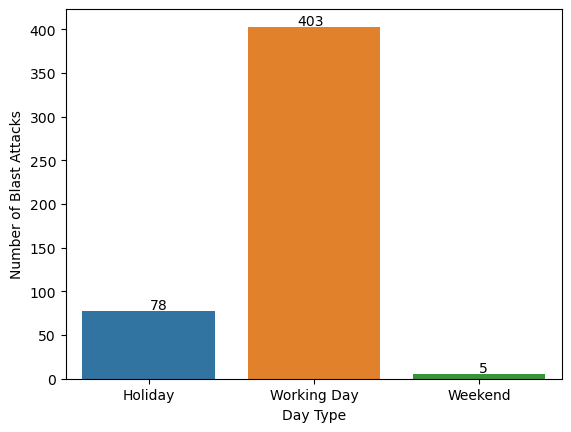

In [77]:
#We will use Count Plot to count occurance of each category that will give us count of Attacks in each Day Type
sns.countplot(data= df, x= df['Blast Day Type']);
plt.xlabel('Day Type')
plt.ylabel('Number of Blast Attacks')
#writing the Number on the Bars
#for Highest Number
plt.text(x = 0.90, y = df['Blast Day Type'].value_counts()[0]+2, s = df['Blast Day Type'].value_counts()[0])

#second one
plt.text(x = 0.005, y = df['Blast Day Type'].value_counts()[1]+2, s = df['Blast Day Type'].value_counts()[1])

#third one
plt.text(x = 2, y = df['Blast Day Type'].value_counts()[2]+2, s = df['Blast Day Type'].value_counts()[2])

plt.show()

**So, the most number of Attacks Happened on a Working Day.**

**Insight 2: Which Province was Attacked most number of Times?**

In [78]:
df['Province'].value_counts()

Province
KPK            251
FATA            70
Punjab          64
Sindh           35
Baluchistan     31
Capital         20
Balochistan     16
AJK              6
Fata             3
Name: count, dtype: int64

In [80]:
#making Fata as FATA
df['Province'].replace({'Fata':'FATA'}, inplace=True)
#making Baluchistan as Balochistan
df['Province'].replace({'Baluchistan':'Balochistan'}, inplace=True)

In [81]:
df['Province'].value_counts()

Province
KPK            251
FATA            73
Punjab          64
Balochistan     47
Sindh           35
Capital         20
AJK              6
Name: count, dtype: int64

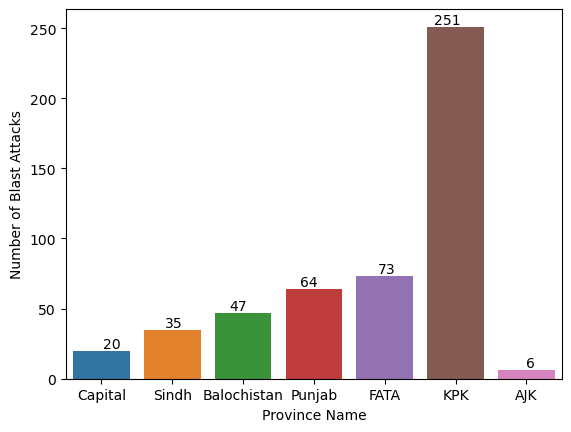

In [104]:
#We will use Count Plot to count occurance of each category that will give us count of Attacks in each Day Type
sns.countplot(data= df, x= df['Province']);
plt.xlabel('Province Name')
plt.ylabel('Number of Blast Attacks')
#writing the Number on the Bars
#for Highest Number-->KPK
plt.text(x = 4.7, y = df['Province'].value_counts()[0]+2, s = df['Province'].value_counts()[0])

#second-->Fata
plt.text(x = 3.9, y = df['Province'].value_counts()[1]+2, s = df['Province'].value_counts()[1])

#third-->Punjab
plt.text(x = 2.8, y = df['Province'].value_counts()[2]+2, s = df['Province'].value_counts()[2])

#Fourth-->Balochistan
plt.text(x = 1.8, y = df['Province'].value_counts()[3]+2, s = df['Province'].value_counts()[3])

#Fifth-->Sindh
plt.text(x = 0.9, y = df['Province'].value_counts()[4]+2, s = df['Province'].value_counts()[4])

#Sixth-->Capital
plt.text(x = 0.02, y = df['Province'].value_counts()[5]+2, s = df['Province'].value_counts()[5])


#AJK
plt.text(x = 6, y = df['Province'].value_counts()[6]+2, s = df['Province'].value_counts()[6])

plt.show()

**KPK is on Top with maximum numbers of Bomb Blast Attacks.**

**Insight 3: Top 10 Cities Where Most Number of Attacks Happened?**

In [122]:
top_10_most_attacked_cities = df['City'].value_counts().head(10)
# Convert the result to a DataFrame
top_10_most_attacked_cities = pd.DataFrame({'City': top_10_most_attacked_cities.index, 'Count': top_10_most_attacked_cities.values})

In [123]:
top_10_most_attacked_cities

,City,Count
0,Peshawar,72
1,Quetta,35
2,Swat,25
3,Bannu,22
4,Karachi,21
5,Rawalpindi,19
6,Islamabad,17
7,Hangu,17
8,Khyber Agency,14
9,Lahore,14


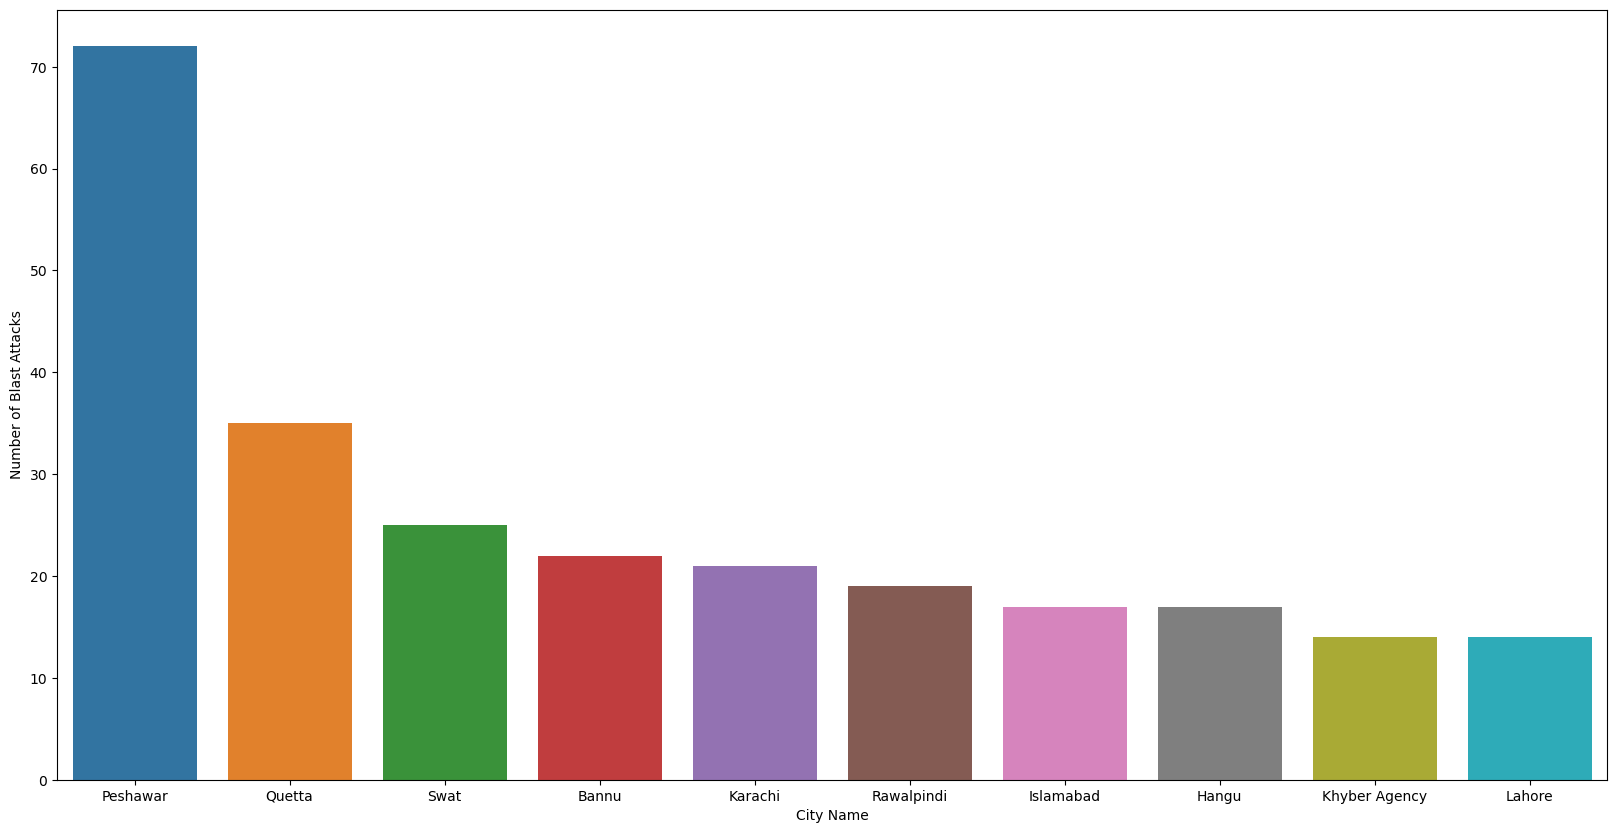

In [127]:
#We will use Count Plot to count occurance of each category that will give us count of Attacks in each Day Type
plt.figure(figsize=(20,10))
sns.barplot(data= df, 
            x= top_10_most_attacked_cities['City'],
            y= top_10_most_attacked_cities['Count']);
plt.xlabel('City Name')
plt.ylabel('Number of Blast Attacks')
plt.show()

**Peshawar was most attacked City with 72 number of Suicide Bomb Attacks**

**Insight 4: Most Targeted Location Types?**

In [143]:
most_targeted_locations = df['Location Category'].value_counts().head(5)
# Convert the result to a DataFrame
most_targeted_locations = pd.DataFrame({'Location Type': most_targeted_locations.index, 'Count': most_targeted_locations.values})

In [144]:
most_targeted_locations

,Location Type,Count
0,Police,92
1,Mobile,70
2,Military,70
3,Religious,57
4,Market,40


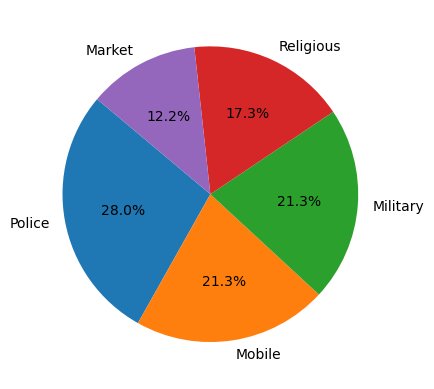

In [312]:
plt.pie(most_targeted_locations['Count'], labels=most_targeted_locations['Location Type'], autopct='%1.1f%%', startangle=140)
plt.show()

**Most attack Location Type was related Police Department.**

**Insight 4: Number of Time High, Medium and Low Location where Targeted and in which Province those Location where targeted?**

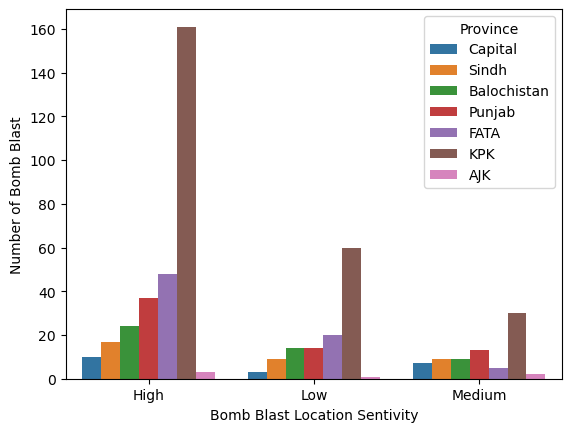

In [165]:
sns.countplot(x= 'Location Sensitivity', 
              data= df, 
              hue= 'Province')
plt.xlabel('Bomb Blast Location Sentivity')
plt.ylabel('Number of Bomb Blast')

plt.show()

In [146]:
df['Location Sensitivity'].value_counts()

Location Sensitivity
High      300
Low       121
Medium     75
Name: count, dtype: int64

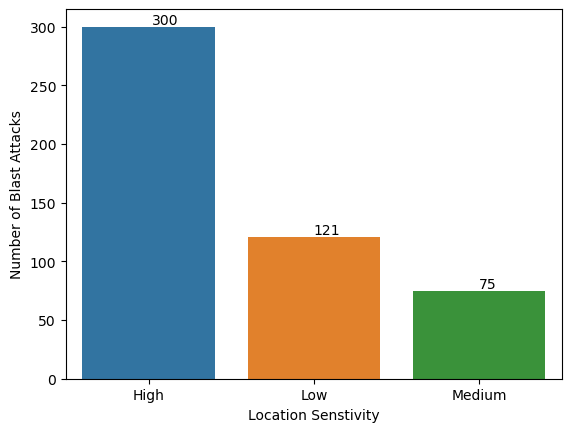

In [156]:
sns.countplot(data= df, x= df['Location Sensitivity']);
plt.xlabel('Location Senstivity')
plt.ylabel('Number of Blast Attacks')
#writing the Number on the Bars
#for Highest Number
plt.text(x = 0.02, y = df['Location Sensitivity'].value_counts()[0]+2, s = df['Location Sensitivity'].value_counts()[0])

#second one
plt.text(x = 1, y = df['Location Sensitivity'].value_counts()[1]+2, s = df['Location Sensitivity'].value_counts()[1])

#third one
plt.text(x = 2, y = df['Location Sensitivity'].value_counts()[2]+2, s = df['Location Sensitivity'].value_counts()[2])

plt.show()

**Most Attacks were Targetting High Sensitive Location**

**Insight 5: Most Targetted Part of Society in Pakistan?**

In [160]:
sorted_df_wrt_target_type
most_targetted_parts = df['Target Type'].value_counts().head(5)
most_targetted_parts = pd.DataFrame({'Target Type': most_targetted_parts.index, 'Count': most_targetted_parts.values})

In [161]:
most_targetted_parts

,Target Type,Count
0,Military,126
1,Police,122
2,Civilian,80
3,Government Official,44
4,Religious,36


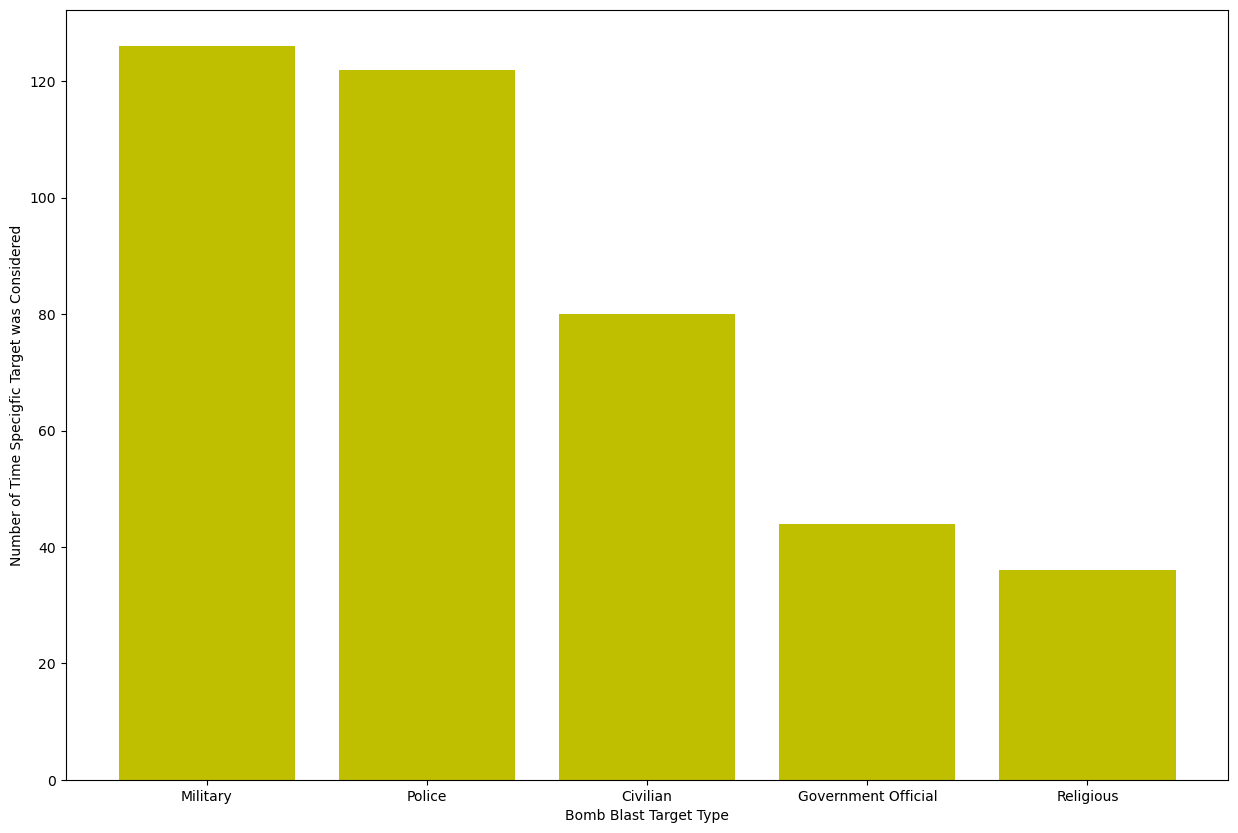

In [170]:
plt.figure(figsize=(15,10))
plt.bar(most_targetted_parts['Target Type'],
           most_targetted_parts['Count'],
           color = 'y')
plt.xlabel('Bomb Blast Target Type')
plt.ylabel('Number of Time Specigfic Target was Considered')

plt.show()

**Mostly Military Sector was Targeted in the Bomb Blasts**

In [173]:
df.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

**Insight 6: Top 3 Bomb Blast in which most people were Killed?**

In [201]:
#lets sort the dataframe by Killed max column to get top 3 firstly
df_sorted_killedmax = df.sort_values(by= 'Killed Max', ascending=False).head(3)

In [209]:
df_sorted_killedmax[['Killed Max', 'City', 'Location']]

,Killed Max,City,Location
434,148.0,Peshawar,Army Public School
68,145.0,karachi,Benazir Survives midnight \ncarnage Karsaz bri...
113,100.0,Rawalpindi,Wah Cant Pakistn Ordinance Factories


Lets Visualize the graph that will represent Highest Max People Killed in any one blast with Location and City.

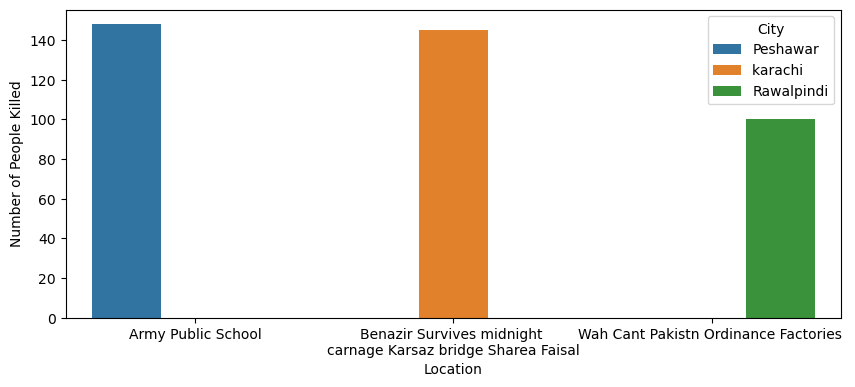

In [210]:
plt.figure(figsize=(10,4))
sns.barplot(data = df_sorted_killedmax,
           x = 'Location', 
           y = 'Killed Max',
           hue = 'City')

plt.xlabel('Location')
plt.ylabel('Number of People Killed')
plt.show()

**Highest Number of People killed in one Attack was in Peshawar**

**Insgiht 7: Total Number of People Killed in every City by Bomb Attacks?**

We will use groupby to group City with Killed max and we will sum Killed Max.

In [184]:
number_of_people_killed_in_every_city = df.groupby('City', as_index=False)['Killed Max'].sum()

In [187]:
#now lets sort that dataset to get cities where most number of people were killed in total attacks
number_of_people_killed_in_every_city.sort_values(by= 'Killed Max', 
                                                  inplace=True,
                                                 ascending=False)

In [192]:
top_4 = number_of_people_killed_in_every_city.head(4)
top_4

,City,Killed Max
61,Quetta,886.20625
57,Peshawar,881.41250
63,Rawalpindi,381.00000
38,Lahore,336.00000


Visualization:

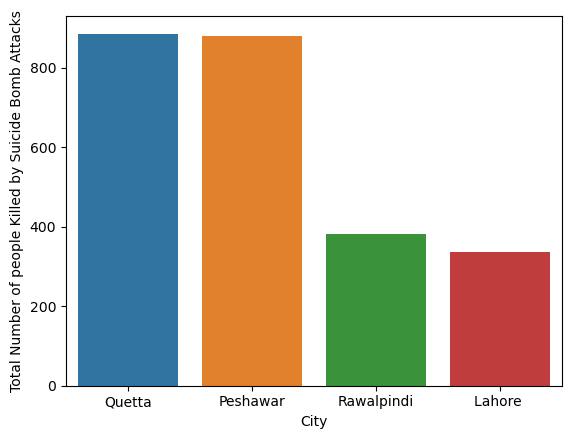

In [195]:
sns.barplot(data = top_4,
            x = 'City', 
            y= 'Killed Max')
plt.xlabel('City')
plt.ylabel('Total Number of people Killed by Suicide Bomb Attacks')
plt.show()

**Most Total Number of People Killed (according to max killed column) in any City with Bomb Blast were in Quetta**

**Insight 8: How many Bomb Blast Happened Every year?**

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     496 non-null    object 
 1   Islamic Date             342 non-null    object 
 2   Blast Day Type           486 non-null    object 
 3   Holiday Type             72 non-null     object 
 4   Time                     285 non-null    object 
 5   City                     496 non-null    object 
 6   Latitude                 493 non-null    float64
 7   Longitude                493 non-null    object 
 8   Province                 496 non-null    object 
 9   Location                 493 non-null    object 
 10  Location Category        496 non-null    object 
 11  Location Sensitivity     496 non-null    object 
 12  Open/Closed Space        461 non-null    object 
 13  Influencing Event/Event  191 non-null    object 
 14  Target Type              4

In [222]:
#creating Year Column
df['Year'] = df['Date'].str.split('-').str[-1]

In [227]:
Total_Blast_in_every_year = df['Year'].value_counts()
Total_Blast_in_every_year = pd.DataFrame({'Year': Total_Blast_in_every_year.index, 'Count': Total_Blast_in_every_year.values})

In [229]:
Total_Blast_in_every_year.head(4)

,Year,Count
0,2009,90
1,2008,61
2,2010,57
3,2007,57


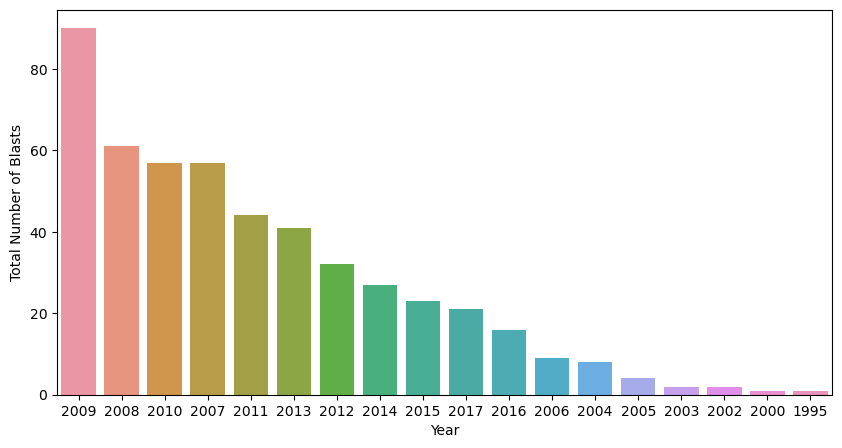

In [232]:
plt.figure(figsize=(10,5))
sns.barplot(data = Total_Blast_in_every_year,
           x= 'Year',
           y= 'Count')
plt.xlabel('Year')
plt.ylabel('Total Number of Blasts')
plt.show()

**Highest Total Number of Blasts Happened in 2009**

**Insight 9: How Number of Blast Vary with every Year?**

In [234]:
sorted_Year = Total_Blast_in_every_year.sort_values(by= 'Year')

In [235]:
sorted_Year

,Year,Count
17,1995,1
16,2000,1
15,2002,2
14,2003,2
12,2004,8
13,2005,4
11,2006,9
3,2007,57
1,2008,61
0,2009,90


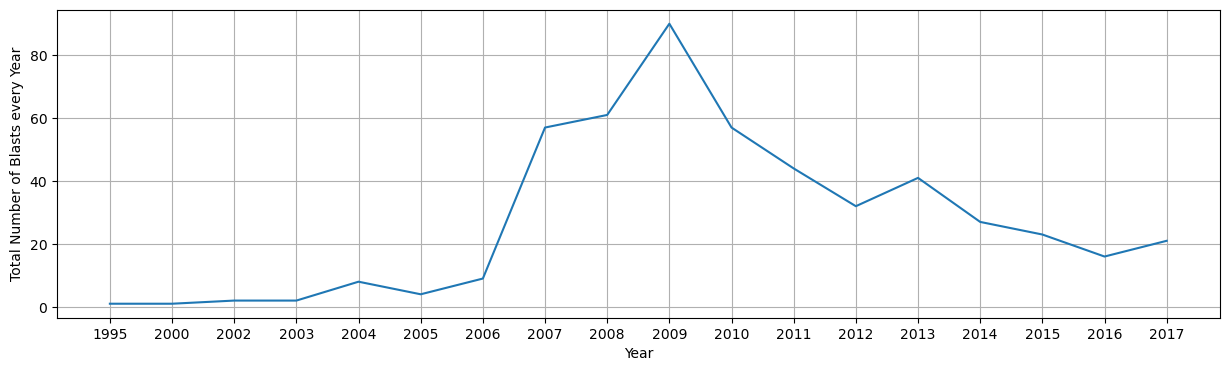

In [240]:
plt.figure(figsize=(15,4))
plt.plot(sorted_Year['Year'],
        sorted_Year['Count'])

plt.xlabel('Year')
plt.ylabel('Total Number of Blasts every Year')
plt.grid()
plt.show()

**Insight 10: Which one of sect was the most targeted in Bomb Blasts?(If any sect was targeted)**

In [246]:
print("Number of Times a Sect was Targeted: ", df['Targeted Sect if any'].notnull().sum())

Number of Times a Sect was Targeted:  97


In [247]:
df['Targeted Sect if any'].fillna('No Sect Targeted', inplace = True)

In [248]:
df['Targeted Sect if any'].value_counts()

Targeted Sect if any
No Sect Targeted    399
Shiite               38
Sunni                38
Christian             9
shiite                9
Shiite/sunni          1
Jews                  1
Ahmedi                1
Name: count, dtype: int64

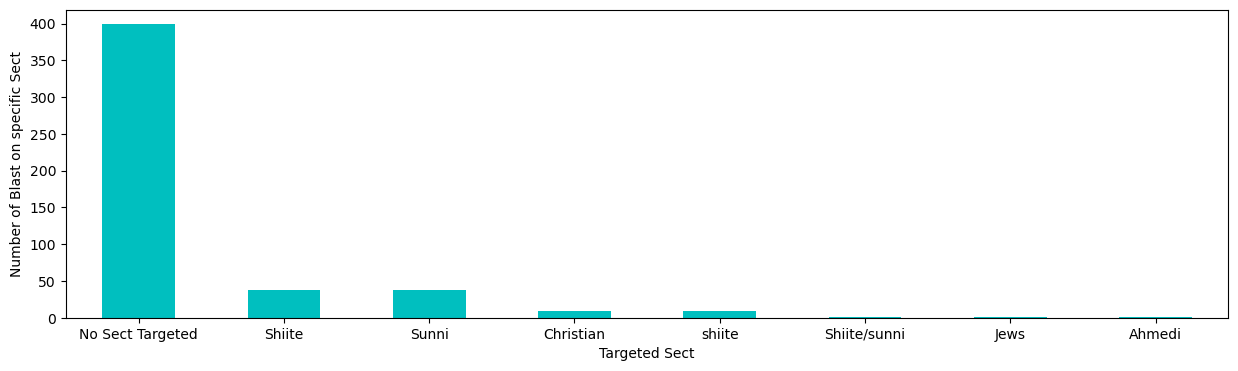

In [253]:
plt.figure(figsize= (15,4))
df['Targeted Sect if any'].value_counts().plot(kind='bar',
                                               rot=0,
                                               color='c')

plt.xlabel('Targeted Sect')
plt.ylabel('Number of Blast on specific Sect')
plt.show()

**Insight 11: Total Number of People Killed and injured in every year with Bomb Blasts Attack?**

In [275]:
#Number of NUll values in killed max and injured max
print('Number of null values in killed max column: ', df['Killed Max'].isna().sum())
print('Number of null values in killed min column: ', df['Killed Min'].isna().sum())
print('Number of null values in Injured max column: ', df['Injured Max'].isna().sum())
print('Number of null values in Injured max column: ', df['Injured Min'].isna().sum())

Number of null values in killed max column:  0
Number of null values in killed min column:  146
Number of null values in Injured max column:  35
Number of null values in Injured max column:  131


In [281]:
#Replacing Null values in Injured Max Column with mean value
df['Injured Max'].fillna(df['Injured Max'].mean(),inplace=True)

#Replacing Null values in Injured Min Column with mean value
df['Injured Min'].fillna(df['Injured Min'].mean(),inplace=True)

#Replacing Null values in Killed Min Column with mean value
df['Killed Min'].fillna(df['Killed Min'].mean(),inplace=True)

In [292]:
#Number of NUll values in killed max and injured max after replacment
print('Number of null values in killed max column after filling nan: ', df['Killed Max'].isna().sum())
print('Number of null values in killed min column after filling nan: ', df['Killed Min'].isna().sum())
print('Number of null values in Injured max column after filling nan: ', df['Injured Max'].isna().sum())
print('Number of null values in Injured max column after filling nan: ', df['Injured Min'].isna().sum())

Number of null values in killed max column after filling nan:  0
Number of null values in killed min column after filling nan:  0
Number of null values in Injured max column after filling nan:  0
Number of null values in Injured max column after filling nan:  0


In [293]:
temp_df = df[['Year', 'Killed Max', 'Killed Min', 'Injured Max', 'Injured Min']]

In [294]:
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     496 non-null    object 
 1   Islamic Date             342 non-null    object 
 2   Blast Day Type           486 non-null    object 
 3   Holiday Type             72 non-null     object 
 4   Time                     285 non-null    object 
 5   City                     496 non-null    object 
 6   Latitude                 493 non-null    float64
 7   Longitude                493 non-null    object 
 8   Province                 496 non-null    object 
 9   Location                 493 non-null    object 
 10  Location Category        496 non-null    object 
 11  Location Sensitivity     496 non-null    object 
 12  Open/Closed Space        461 non-null    object 
 13  Influencing Event/Event  191 non-null    object 
 14  Target Type              4

In [296]:
temp_df

,Year,Killed Max,Killed Min,Injured Max,Injured Min
0,1995,15.0,14.000000,60.0,31.39726
1,2000,3.0,14.725714,3.0,31.39726
2,2002,15.0,13.000000,40.0,20.00000
3,2002,12.0,14.725714,51.0,31.39726
4,2003,47.0,44.000000,65.0,31.39726
...,...,...,...,...,...
491,2017,22.0,21.000000,0.0,25.00000
492,2017,7.0,7.000000,22.0,22.00000
493,2017,2.0,2.000000,8.0,8.00000
494,2017,3.0,1.000000,8.0,6.00000


In [297]:
#finding average number of people killed
temp_df['people_killed'] = (temp_df['Killed Max'] + temp_df['Killed Min']) / 2

#finding avaerage number of pople Injured
temp_df['people_injured'] = (temp_df['Injured Max'] + temp_df['Injured Min']) / 2

C:\Users\DELL\AppData\Local\Temp\ipykernel_16672\3907867660.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_16672\3907867660.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [299]:
temp_df.head()

,Year,Killed Max,Killed Min,Injured Max,Injured Min,people_killed,people_injured
0,1995,15.0,14.000000,60.0,31.39726,14.500000,45.69863
1,2000,3.0,14.725714,3.0,31.39726,8.862857,17.19863
2,2002,15.0,13.000000,40.0,20.00000,14.000000,30.00000
3,2002,12.0,14.725714,51.0,31.39726,13.362857,41.19863
4,2003,47.0,44.000000,65.0,31.39726,45.500000,48.19863


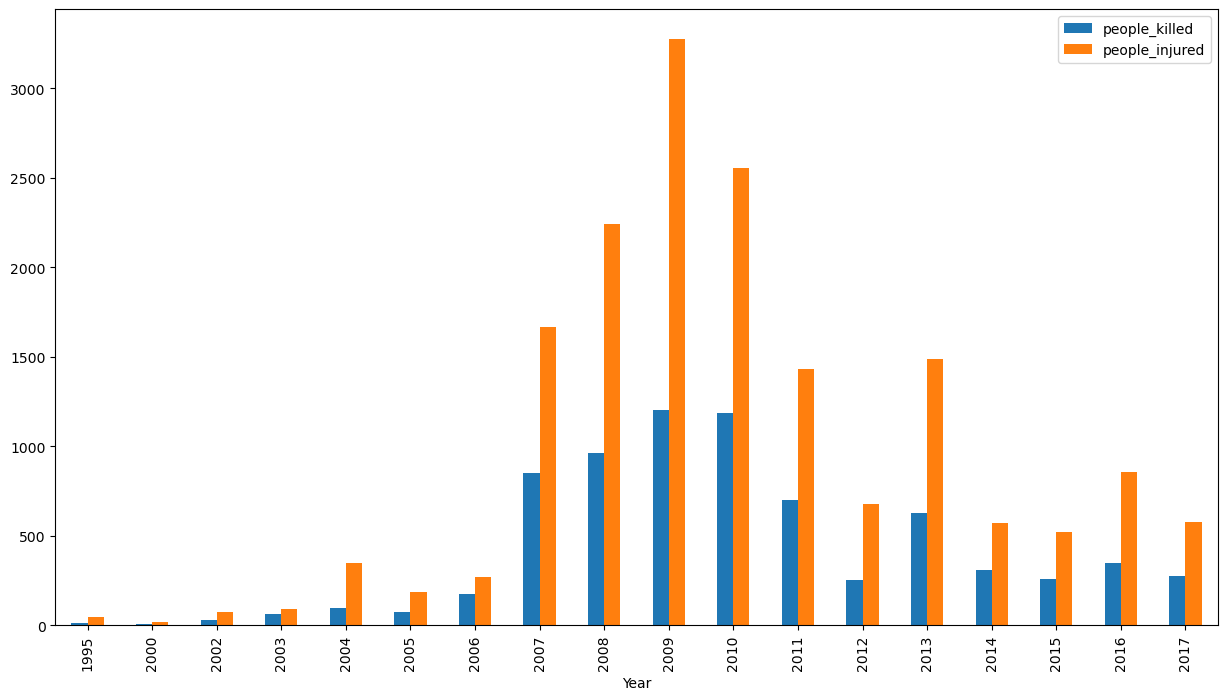

In [303]:
yearly = temp_df.groupby(["Year"], as_index=False).sum()
fig = yearly.plot(x="Year", 
                y=["people_killed", "people_injured"], 
                kind="bar", 
                figsize=(15,8), align='center'
                 )

**Insight 12: Which Day Type (when blast happened) had most number of Victims(Either Wroking Day, Hoilday) ?**

Victims will be Killed plus Injured...

In [304]:
df['Total_Victims'] = temp_df['people_killed'] + temp_df['people_injured']

In [305]:
df_day_Type_total_victimes= df.groupby('Blast Day Type', as_index=False)['Total_Victims'].sum()

In [306]:
df_day_Type_total_victimes

,Blast Day Type,Total_Victims
0,Holiday,3948.113223
1,Weekend,249.061487
2,Working Day,19561.343940


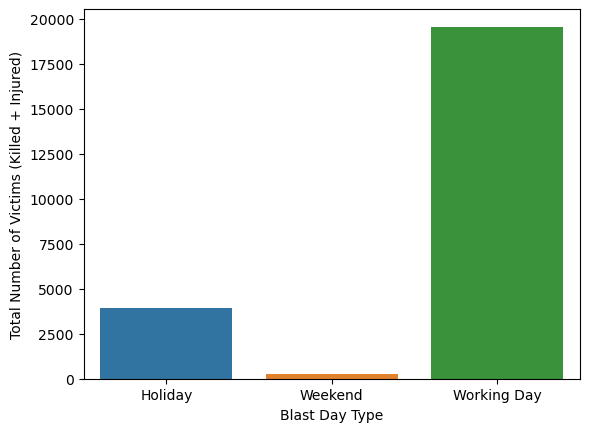

In [307]:
sns.barplot(data = df_day_Type_total_victimes,
           x= 'Blast Day Type',
           y= 'Total_Victims')

plt.xlabel('Blast Day Type')
plt.ylabel('Total Number of Victims (Killed + Injured)')
plt.show()